In [130]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# from MLearningUtils import MLearningUtils as util
import MLearningUtils as mlUtil


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from platform import python_version
print(python_version())

3.9.2


In [126]:
df = pd.DataFrame()
df = pd.read_csv('data/consumer_complaints_with_narrative.csv')
print(df.shape)
df.head()

(66799, 11)


,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company,state,zip_code,company_response,timely_response,consumer_disputed
0,Debt collection,I do not know,Disclosure verification of debt,Right to dispute notice not received,I was denied employment because of a judgment ...,Encore Capital Group,NY,113XX,Closed with explanation,Yes,0
1,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,I have a credit card through XXXX XXXX and XXX...,Experian,IL,606XX,Closed with non-monetary relief,Yes,0
2,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,Almost daily phone calls from Stellar Recovery...,Stellar Recovery Inc.,MI,480XX,Closed with explanation,Yes,1
3,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I submitted my monthly mortgage payment to Pri...,Primary Residential Mortgage,CT,066XX,Closed with monetary relief,Yes,0
4,Student loan,Non-federal student loan,Dealing with my lender or servicer,Received bad information about my loan,I contacted America Education Services in XX/X...,AES/PHEAA,FL,321XX,Closed with explanation,Yes,1


## Step 1: Select features

In [129]:
util = mlUtil.MLearningUtils()

util.check_missing_data(df)

Qtd rows X columns:(66799, 11)

Are there any Missing values?:True

Total of missing ROWS values: 46438

Has duplicated values? how to drop => df=df.drop_duplicates() 
False    66535
True       264
dtype: int64

Missing values by columns:
product                             0
sub_product                     20452
issue                               0
sub_issue                       33868
consumer_complaint_narrative        0
company                             0
state                             186
zip_code                          189
company_response                    0
timely_response                     0
consumer_disputed                   0
dtype: int64

Total sum of missing values: 54695

Percentage of missing values for each variable:
product                         0.000000
sub_product                     0.306172
issue                           0.000000
sub_issue                       0.507014
consumer_complaint_narrative    0.000000
company                         0.000000

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().value_counts()

False    66535
dtype: int64

In [9]:
df.columns

Index(['product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company', 'state', 'zip_code',
       'company_response', 'timely_response', 'consumer_disputed'],
      dtype='object')

In [10]:
#'state', 'zip_code',
# df.zip_code.notna(), 

features = ['product', 'issue', 'company', 'company_response', 'timely_response','consumer_disputed']
df_features = df[features].copy()
df_features.duplicated().value_counts()

True     52889
False    13646
dtype: int64

In [11]:
df_features=df_features.drop_duplicates()

In [12]:
df_features.duplicated().value_counts()

False    13646
dtype: int64

In [13]:
util.check_missing_data(df_features)

Qtd rows X columns:(13646, 6)

Are there any Missing values?:False

Total of missing ROWS values: 0

Has duplicated values? how to drop => df=df.drop_duplicates() 
False    13646
dtype: int64

Missing values by columns:
product              0
issue                0
company              0
company_response     0
timely_response      0
consumer_disputed    0
dtype: int64

Total sum of missing values: 0

Percentage of missing values for each variable:
product              0.0
issue                0.0
company              0.0
company_response     0.0
timely_response      0.0
consumer_disputed    0.0
dtype: float64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13646 entries, 0 to 66794
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product            13646 non-null  object
 1   issue              13646 non-null  object
 2   company            13646 non-null  object
 3   company_response   13646 non-null

In [14]:
df_features.head()

,product,issue,company,company_response,timely_response,consumer_disputed
0,Debt collection,Disclosure verification of debt,Encore Capital Group,Closed with explanation,Yes,0
1,Credit reporting,Improper use of my credit report,Experian,Closed with non-monetary relief,Yes,0
2,Debt collection,Cont'd attempts collect debt not owed,Stellar Recovery Inc.,Closed with explanation,Yes,1
3,Mortgage,"Loan servicing, payments, escrow account",Primary Residential Mortgage,Closed with monetary relief,Yes,0
4,Student loan,Dealing with my lender or servicer,AES/PHEAA,Closed with explanation,Yes,1


In [15]:
# Encode company to discrete values
util.encode_cat_to_discrete_feature(df_features, 'company', 'company_code')

column: company created


## Step 2: Cross-validate a model with one feature

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


X = df_features.loc[:, ['company_code']]
y = df_features.consumer_disputed

In [17]:
X.shape, y.shape

((13646, 1), (13646,))

In [18]:
logreg = LogisticRegression()

cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()


0.691338130539303

In [19]:
y.value_counts(normalize=True)

0    0.691338
1    0.308662
Name: consumer_disputed, dtype: float64

## Step 3: Cross-validate a Pipeline with more features

In [20]:
df_features.head()

,product,issue,company,company_response,timely_response,consumer_disputed,company_code
0,Debt collection,Disclosure verification of debt,Encore Capital Group,Closed with explanation,Yes,0,755
1,Credit reporting,Improper use of my credit report,Experian,Closed with non-monetary relief,Yes,0,785
2,Debt collection,Cont'd attempts collect debt not owed,Stellar Recovery Inc.,Closed with explanation,Yes,1,1988
3,Mortgage,"Loan servicing, payments, escrow account",Primary Residential Mortgage,Closed with monetary relief,Yes,0,1669
4,Student loan,Dealing with my lender or servicer,AES/PHEAA,Closed with explanation,Yes,1,29


In [21]:
df_features.columns

Index(['product', 'issue', 'company', 'company_response', 'timely_response',
       'consumer_disputed', 'company_code'],
      dtype='object')

In [22]:
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler

If most of the elements of the matrix have 0 value, then it is called a `sparse matrix`. (e.g. `OneHotEncoder(sparse=False)`)

Why to use Sparse Matrix instead of simple matrix ?

    - Storage: There are lesser non-zero elements than zeros and thus lesser memory can be used to store only those elements.
    
    - Computing time: Computing time can be saved by logically designing a data structure traversing only non-zero elements..

In [23]:
# sparse : bool, default=True 
# Will return sparse matrix if set True else will return an array.
one_hot_enc = OneHotEncoder(sparse=False)

In [24]:
print(one_hot_enc.fit_transform(df_features[['timely_response']]))

print(one_hot_enc.categories_)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[array(['No', 'Yes'], dtype=object)]


In [25]:
cols = ['timely_response','company_code']

X = df_features[cols]
y = df_features.consumer_disputed


In [26]:
from sklearn.pipeline import Pipeline

# chain sequential steps together
from sklearn.pipeline import make_pipeline

# use when different features need different preprocessing
from sklearn.compose import make_column_transformer


# make_column_transformer(
#      (StandardScaler(), ['numerical_column']),
#      (OneHotEncoder(), ['categorical_column']))

column_trans = make_column_transformer(
    (OneHotEncoder(), ['timely_response']),  
    (StandardScaler(), ['company_code']),    
    remainder='passthrough')

# column_trans.fit_transform(X)


In [27]:
pipe = make_pipeline(column_trans, logreg)

cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()


0.691338130539303

 ## Exploratory Data Analysis

In [28]:
df_features['product'].value_counts()

Debt collection            6396
Mortgage                   1892
Credit card                1589
Consumer Loan              1326
Bank account or service     924
Payday loan                 399
Credit reporting            333
Student loan                308
Money transfers             208
Prepaid card                171
Other financial service     100
Name: product, dtype: int64

In [29]:
util.encode_cat_to_discrete_feature(df_features, 'product', 'product_code')

column: product created


In [30]:
print(df_features['company_response'].value_counts())

Closed with explanation            9426
Closed with non-monetary relief    1636
Closed with monetary relief        1287
Closed                              903
Untimely response                   394
Name: company_response, dtype: int64


In [31]:
util.encode_cat_to_discrete_feature(df_features, 'company_response', 'company_response_code')

column: company_response created


In [32]:
print(df_features['issue'].value_counts())

Cont'd attempts collect debt not owed    1919
Disclosure verification of debt          1147
Communication tactics                    1119
False statements or representation        809
Improper contact or sharing of info       722
                                         ... 
Lost or stolen money order                  4
Shopping for a line of credit               3
Lender sold the property                    1
Incorrect exchange rate                     1
Lender damaged or destroyed vehicle         1
Name: issue, Length: 90, dtype: int64


In [33]:
util.encode_cat_to_discrete_feature(df_features, 'issue', 'issue_code')

column: issue created


In [94]:
df_features.head()

,product,issue,company,company_response,timely_response,consumer_disputed,company_code,product_code,company_response_code,issue_code
0,Debt collection,Disclosure verification of debt,Encore Capital Group,Closed with explanation,Yes,0,755,4,1,37
1,Credit reporting,Improper use of my credit report,Experian,Closed with non-monetary relief,Yes,0,785,3,3,47
2,Debt collection,Cont'd attempts collect debt not owed,Stellar Recovery Inc.,Closed with explanation,Yes,1,1988,4,1,24
3,Mortgage,"Loan servicing, payments, escrow account",Primary Residential Mortgage,Closed with monetary relief,Yes,0,1669,6,2,56
4,Student loan,Dealing with my lender or servicer,AES/PHEAA,Closed with explanation,Yes,1,29,10,1,34


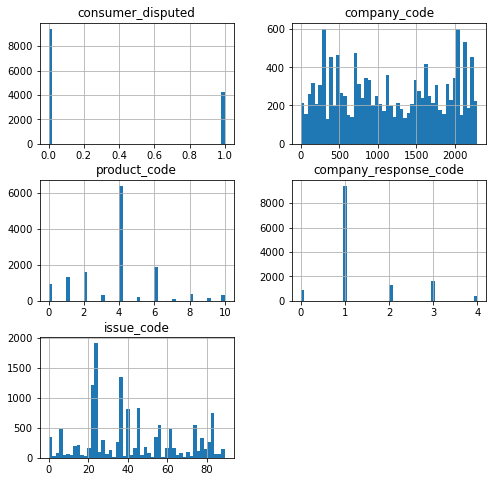

In [98]:
df_features.hist(bins=50, figsize=(8,8))

plt.show()

<AxesSubplot:>

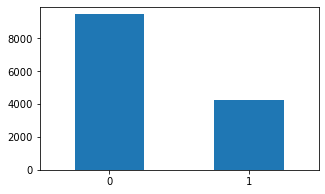

In [97]:
df_features['consumer_disputed'].value_counts().plot.bar(figsize=(5, 3), rot=0)

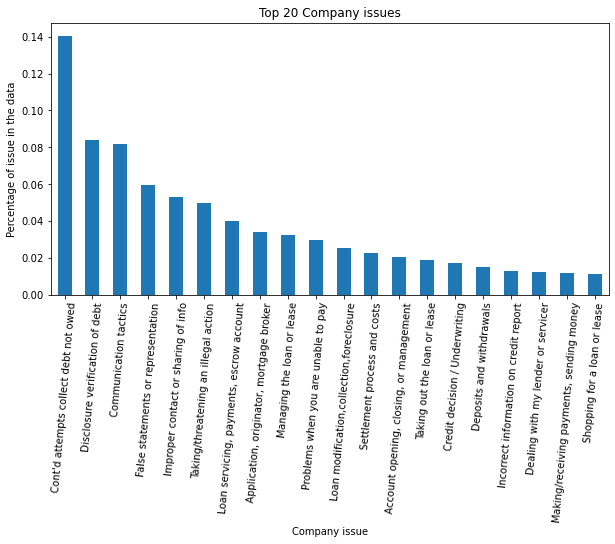

In [55]:
# check how many issues of different companies there are
# percentage of issues 

#(df_features['issue'].value_counts() / len(df_features)).sort_index().plot.bar()
(df_features['issue'].value_counts() / len(df_features)).head(20).plot.bar(figsize=(10, 5), rot=85)

#(df_features['issue'].value_counts()).head(20).plot.bar(figsize=(10, 5), rot=85)

# plot

plt.title('Top 20 Company issues')
plt.ylabel('Percentage of issue in the data')
plt.xlabel('Company issue')
plt.show()

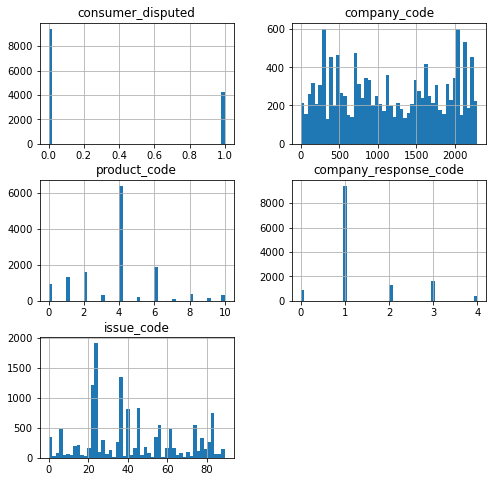

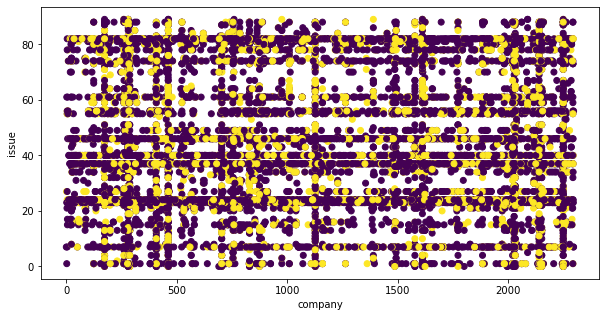

In [122]:
plt.figure(figsize=(10, 5))
plt.scatter(df_features['company_code'], df_features['issue_code'], c=df_features['consumer_disputed']==1)
plt.xlabel('company')
plt.ylabel('issue')
plt.show()

In [57]:
# df_features['company_response'].hist(bins=50, figsize=(5,5), legend=True)
# plt.xticks(rotation=75)


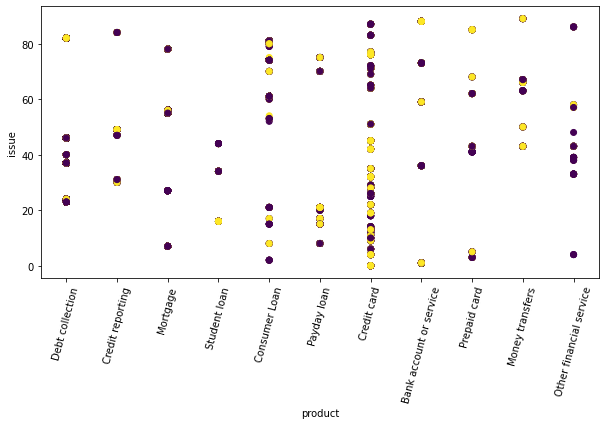

In [83]:

# Credit card product has the most consumer disputes by issue

plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
plt.scatter(df_features['product'], df_features['issue_code'], c=df_features['consumer_disputed']==1)
plt.xlabel('product')
plt.ylabel('issue')
plt.show()

In [120]:
# Student loan product has 3 category issues that implies consumer disputes

print(df_features['issue'][(df_features['consumer_disputed']==1) & (df_features['product_code']==10)].shape)

df_features['issue'][(df_features['consumer_disputed']==1) & (df_features['product_code']==10)].value_counts()

(103,)


Dealing with my lender or servicer          57
Can't repay my loan                         31
Getting a loan                              15
APR or interest rate                         0
Other fee                                    0
                                            ..
Credit determination                         0
Credit decision / Underwriting               0
Credit card protection / Debt protection     0
Convenience checks                           0
Wrong amount charged or received             0
Name: issue, Length: 90, dtype: int64

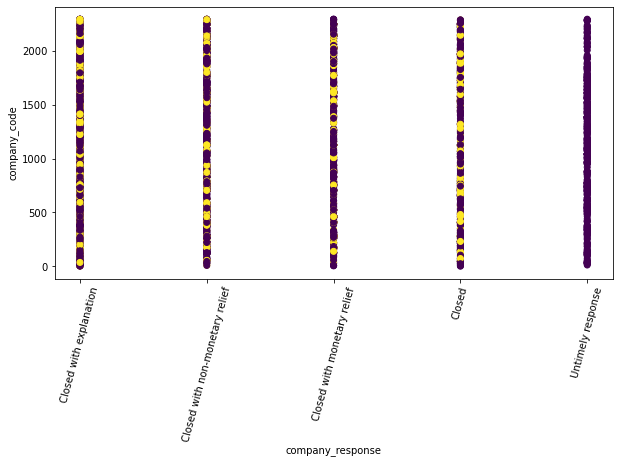

In [87]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
plt.scatter(df_features['company_response'], df_features['company_code'], c=df_features['consumer_disputed']==1)
plt.xlabel('company_response')
plt.ylabel('company_code')
plt.show()

<AxesSubplot:>

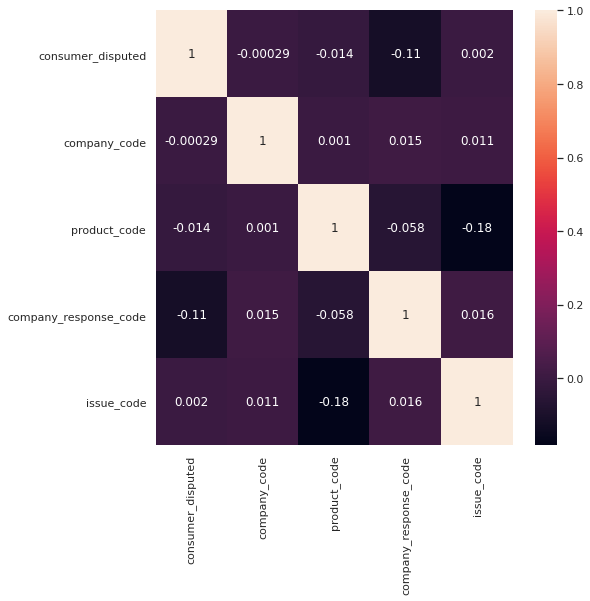

In [124]:
import seaborn as sns
sns.set()

plt.subplots(figsize=(8,8))
sns.heatmap(df_features.corr(), annot=True)